## Measured Broadband EDA, Performance Evaluation and Clustering 

This projects aims to: 
 - Analyse the distribution of broadband services in different service providers across several states in Australia. 
 - Evaluate the broadband performance by analysing the KPI, classify it if the service is impaired or underperforming and determine the  value of download speed, upload speed and latency that classifies them as one using Multiple Logistic Regression.
 - Segment the broadband service regardless of the tier offered by service providers using K-Means Clustering and also to have some preferences given state, technology and geography.

The reference states that the data was acquired from households volunteering to receive a Whitebox that tests the performance of their fixed-line broadband services.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Notebooks\MBA\mba-report-18-data-release-august-2022.csv')
df.head(5)

,unit_id,connection_type,technology,tier,rsp,state_or_territory,geography,is_this_service_impaired,is_this_service_underperforming,gateway_mac,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
0,2975233,NBN,Fibre to the Node,50/20 Mbps,TPG,NSW,Urban,True,False,C471xxxxxx,...,8.52,7.73,9.51,6.57,5.96,8.07,6.64,6.05,8.07,0.03
1,1029377,NBN,Fibre to the Premises,50/20 Mbps,TPG,TAS,Urban,False,False,B4B0xxxxxx,...,17.84,16.34,18.86,12.51,12.47,12.58,12.54,12.52,12.58,NaN
2,55971333,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Superloop,NSW,Urban,False,False,F02Fxxxxxx,...,18.87,18.31,19.01,9.26,7.72,39.27,11.10,8.25,39.27,0.23
3,4991237,NBN,Fibre to the Curb,100/40 Mbps,Optus,NSW,Urban,False,False,3C37xxxxxx,...,37.55,37.22,38.01,7.43,6.42,70.93,8.66,6.48,70.93,0.00
4,45564677,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Telstra,VIC,Urban,False,False,20B0xxxxxx,...,18.22,17.88,18.37,9.14,8.59,10.07,9.28,8.84,9.96,0.76


### Understading our data set

The columns in our data set shows different service providers in different states together with its corresponding KPI.

 - **unit_id** - A unique identifier for each Whitebox
 - **connection_type** - NBN (fixed-line), NBN very high speed (fixed-Iine 500-990/50 Mbps tier),NBN_FW (fixed wireless), Non NBN fixed line services
 - **technology** - The access technology used for the service
 - **tier** - The maximum download and upload speed associated with the wholesale NBN speed tier of the service
 - **rsp** - Retail Service Provider
 - **state_or_territory** - The State and/or Territory in Australia the Whitebox is located in. NB: South Australia (SA) and the Northern Territory (NT) have been combined due to low sample sizes
  - **geography** - The classification of the geographical location under: major rural, minor rural, remote, urban and isolated for each Whitebox
 - **gateway_mac** - The fuzzed MAC address of the participants’ router
 - **KPI Columns:**
     - is_this_service_impaired
     - is_this_service_ underperforming
     - All hour trimmed mean/maximum/minimum download speed
     - Busy hour trimmed mean/maximum/minimum download speed
     - All hour trimmed mean/maximum/minimum upload speed
     - Busy hour trimmed mean/maximum/minimum upload speed
     - All hour trimmed mean/maximum/minimum latency
     - Busy hour trimmed mean/maximum/minimum latency
     - Average daily outages

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   unit_id                                1443 non-null   int64  
 1   connection_type                        1443 non-null   object 
 2   technology                             1443 non-null   object 
 3   tier                                   1443 non-null   object 
 4   rsp                                    1209 non-null   object 
 5   state_or_territory                     1443 non-null   object 
 6   geography                              1403 non-null   object 
 7   is_this_service_impaired               1443 non-null   bool   
 8   is_this_service_underperforming        1443 non-null   bool   
 9   gateway_mac                            1443 non-null   object 
 10  All hour trimmed mean download speed   1443 non-null   float64
 11  All 

In [4]:
#dropping our null values
df = df.dropna()
df

,unit_id,connection_type,technology,tier,rsp,state_or_territory,geography,is_this_service_impaired,is_this_service_underperforming,gateway_mac,...,Busy hour trimmed mean upload speed,Busy hour minimum upload speed,Busy hour maximum upload speed,All hour trimmed mean latency,All hour minimum latency,All hour maximum latency,Busy hour trimmed mean latency,Busy hour minimum latency,Busy hour maximum latency,Average daily outages
0,2975233,NBN,Fibre to the Node,50/20 Mbps,TPG,NSW,Urban,True,False,C471xxxxxx,...,8.52,7.73,9.51,6.57,5.96,8.07,6.64,6.05,8.07,0.03
2,55971333,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Superloop,NSW,Urban,False,False,F02Fxxxxxx,...,18.87,18.31,19.01,9.26,7.72,39.27,11.10,8.25,39.27,0.23
3,4991237,NBN,Fibre to the Curb,100/40 Mbps,Optus,NSW,Urban,False,False,3C37xxxxxx,...,37.55,37.22,38.01,7.43,6.42,70.93,8.66,6.48,70.93,0.00
4,45564677,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Telstra,VIC,Urban,False,False,20B0xxxxxx,...,18.22,17.88,18.37,9.14,8.59,10.07,9.28,8.84,9.96,0.76
5,1028872,NBN,Hybrid Fibre Coaxial,50/20 Mbps,TPG,NSW,Urban,False,False,1C3Bxxxxxx,...,4.70,4.40,4.80,11.88,9.91,17.85,12.10,10.16,13.94,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,54368821,NBN,Hybrid Fibre Coaxial,100/20 Mbps,Dodo & iPrimus,VIC,Urban,False,False,3C7Cxxxxxx,...,18.18,17.99,18.36,9.64,9.04,18.07,10.36,9.38,18.07,0.00
1435,6986261,NBN,Hybrid Fibre Coaxial,50/20 Mbps,Aussie Broadband,VIC,Urban,False,False,F8CAxxxxxx,...,18.44,18.39,18.49,8.71,8.42,10.66,8.89,8.67,9.54,0.00
1436,4329453,NBN,Fibre to the Node,12/1 Mbps,TPG,QLD,Major Rural,False,False,F48Cxxxxxx,...,0.94,0.89,0.98,28.22,27.34,43.23,30.03,27.61,43.23,9.17
1437,1029341,NBN,Hybrid Fibre Coaxial,250/25 Mbps,TPG,VIC,Urban,False,False,5004xxxxxx,...,22.38,22.29,22.47,8.27,7.68,10.10,8.39,7.91,8.80,0.73


### Exploratory Data Analysis

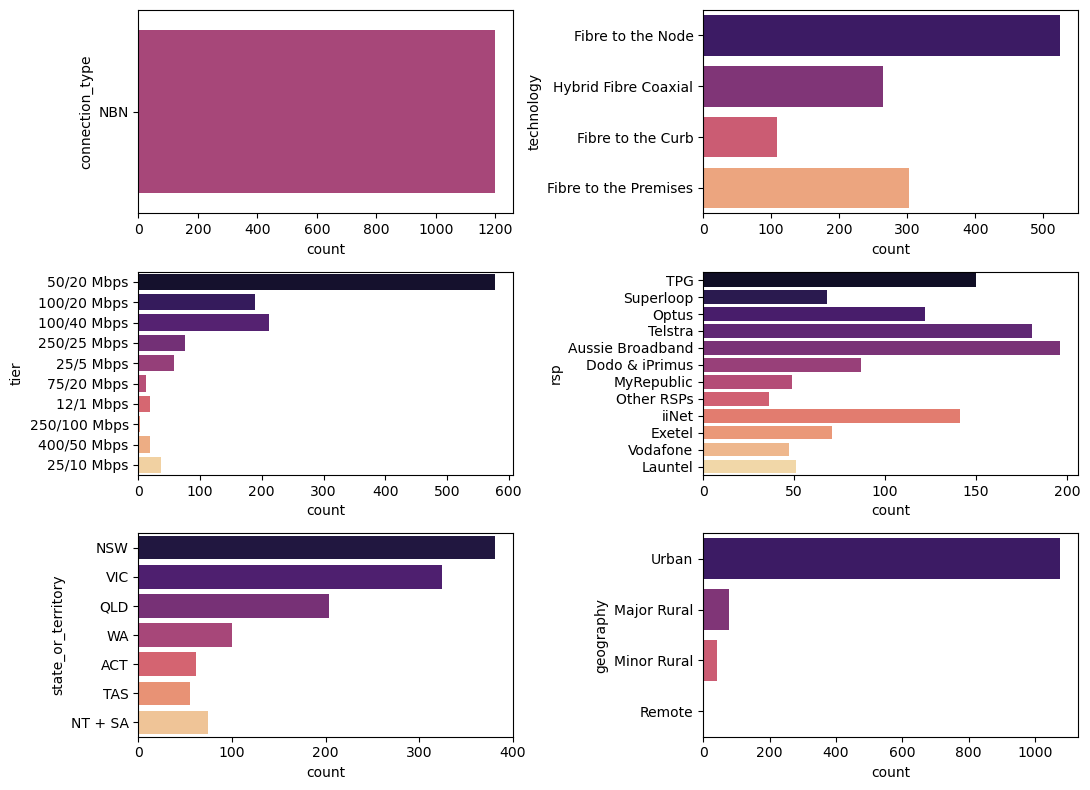

<Figure size 640x480 with 0 Axes>

In [5]:
categories = ['connection_type', 'technology', 'tier', 'rsp', 'state_or_territory', 'geography']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11,8))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=15)

for i, cat in enumerate(categories):
    sns.countplot(data=df, y=cat, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

Based from the visualizations above we can say the following observations in our data set:
 - The data set contains only fixed-line connection type (NBN).
 - Majority of the samples are connected to Fibre to the Node followed by Fiber to the Premises connection.
 - Most of the users in the data set are subscribed to 50/20 Mbps speed and the least subscribed connection type is 250/100 Mbps which is also has the highest upload speed of 100 Mbps.
 - Aussie Broadband has the highest number of samples or subscribers in the data set followed by Telstra. TPG and iNet is trailing behind these two service providers.
 - New South Wales has the highest number of internet connection and majority of the subscribers are situated in urban geography

### Plotting service providers vs all other variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


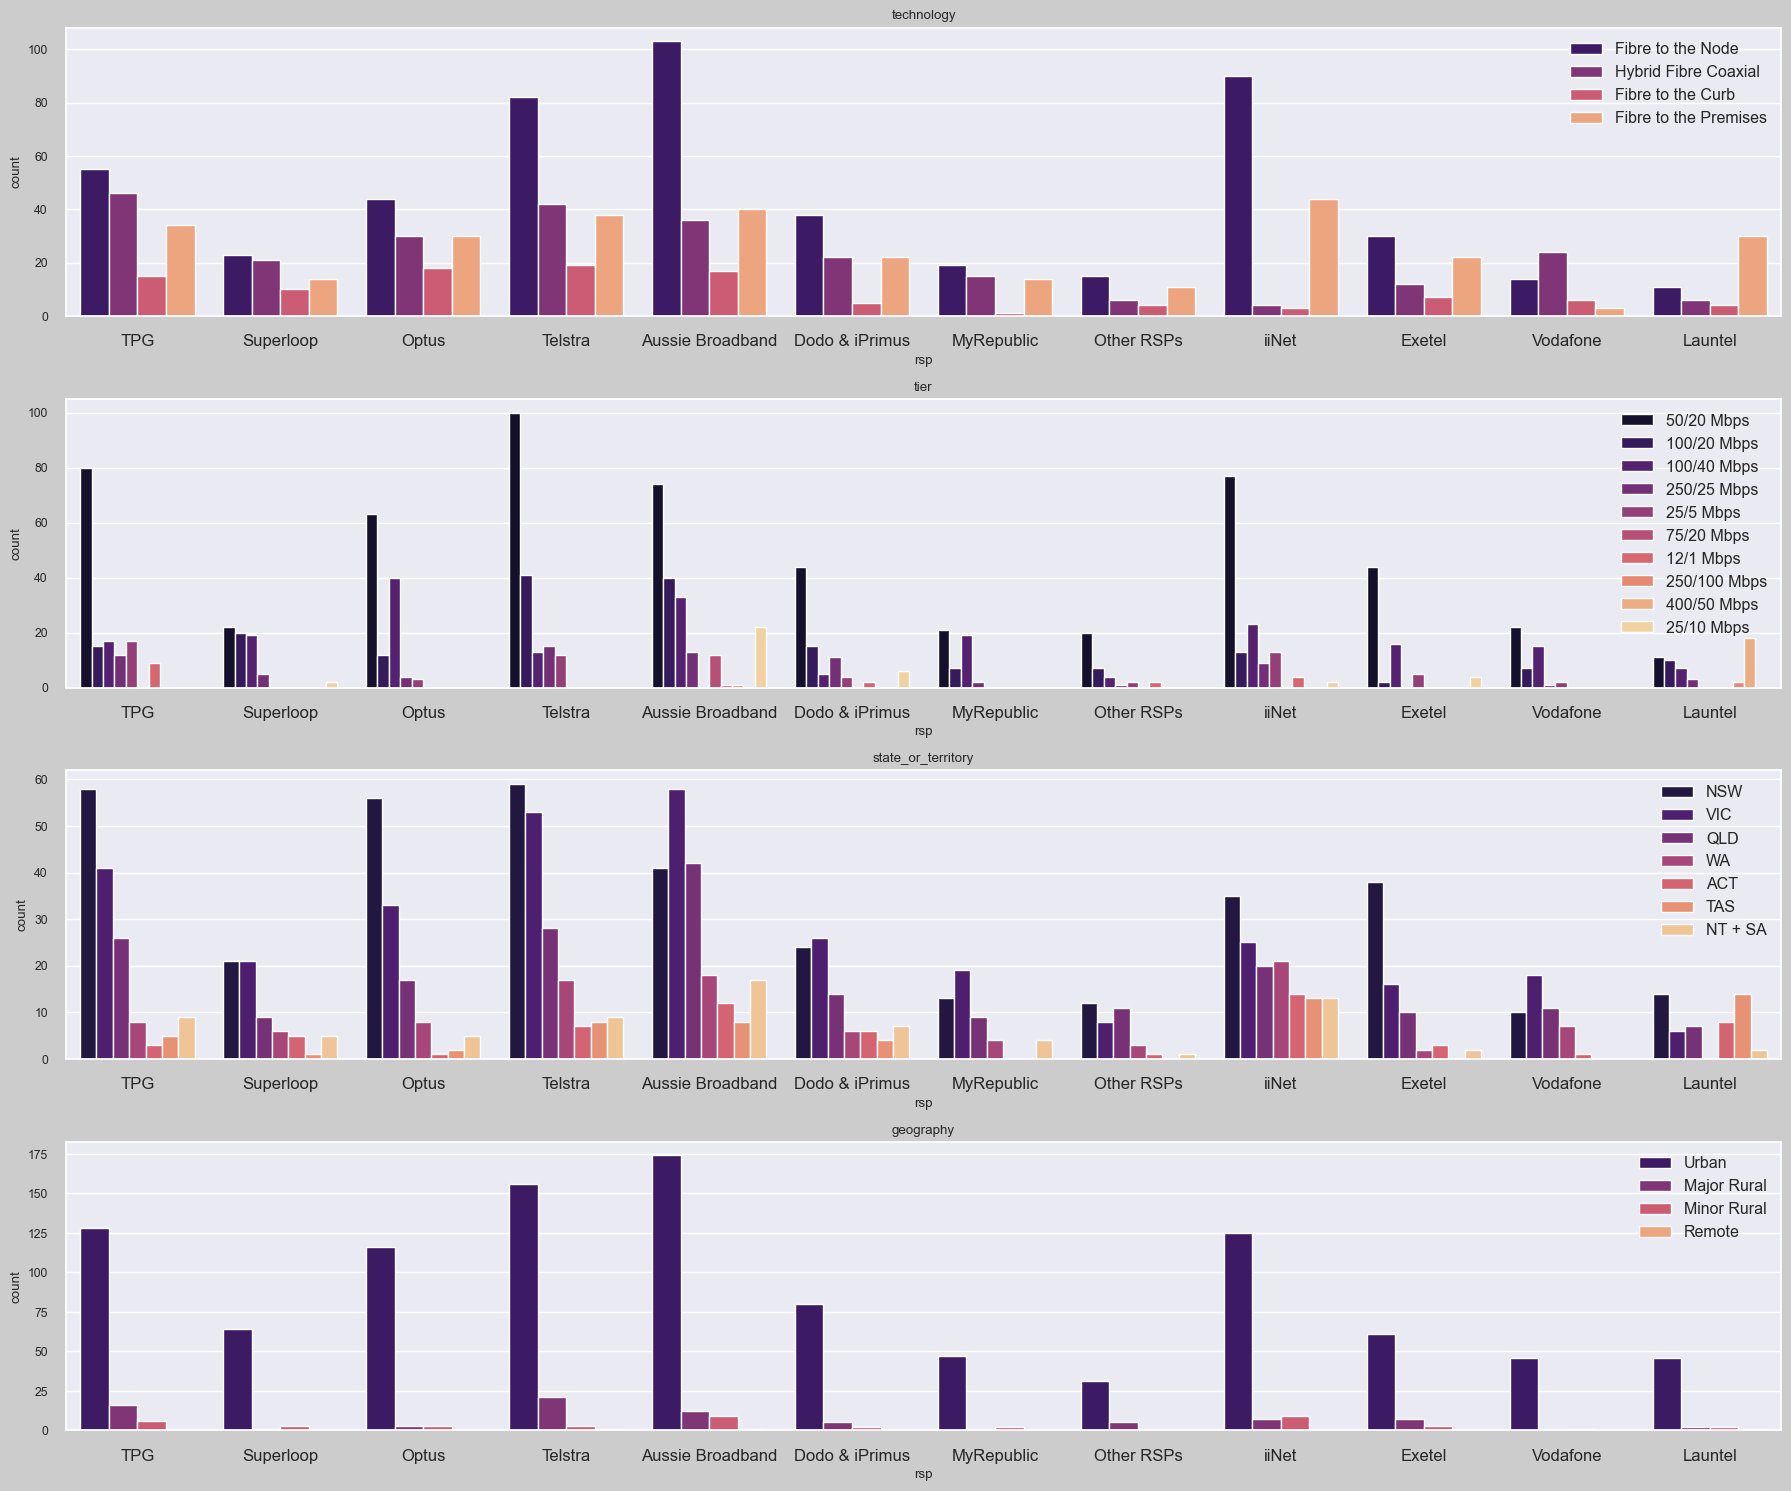

<Figure size 800x550 with 0 Axes>

In [93]:
category = ['technology', 'tier', 'state_or_territory', 'geography']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18,15))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('xtick', labelsize=12)
plt.subplots_adjust(hspace=0.5)
plt.legend(bbox_to_anchor=(1.15, -0.1))

for i, cat in enumerate(category):
    sns.countplot(data=df, x='rsp', hue=cat, ax=axes[i], palette='magma')
    axes[i].legend(loc='upper right', fontsize='large')
    axes[i].set_title(cat)
    
fig.tight_layout()
plt.show()
plt.clf()

### Observations
There are lots of observations we can get from the visualization and for the sake of this project not being too lengthy, we will only be taking notes of those who tops in the comparison.

**RSP vs. Technology**
 - Aussie Broadband, Telstra and iNet are the major providers of Fiber to the Node connection.
 - Hybrid Fibre Coaxial and Fiber to the Premises are second preferred connection which number varies depending on the service provider. iNet tops the chart in providing Fiber to the premises while TPG tops in Hybrid Fiber Coaxial.
 - Fiber to the curb has the lowest number of subscribers which is also understandable due to the fact that out of these four, it has the least speed ceiling for both upload and download.
 
**RSP vs. Tier**
 - Telstra is our top provider of 50/20 Mbps connection which also offers 100/20 Mbps as it ranks second behind Dodo & iPrimus.
 - Observations also tell that Aussie Broadband still offers 25/10 Mbps.
 - Launtel offers 250/100 Mbps and tops the other providers in servicing 400/50 Mbps even though it does not have a lot of subscribers in other tiers.

**RSP vs. State**
 - TPG, Optus and Telstra are the top three RSP in New South Wales (NSW) while Aussie Broadband tops in providing internet connection in Victoria State.
 
**RSP vs. Geography**
 - It is not a surprise that majority of RSP caters internet subscription in urban and residential areas.

### Performance Evaluation
#### Retail Service Provider per KPI metrics

#### Understanding the KPI
 - **Trimmed mean** - 5% of the maximum and minimum KPI values are excluded to minimize outliers
 - **Download speed** - the rate which digital asset is transferred from the internet to user's device. Higher the better.
 - **Upload speed** - the rate which digital asset is transferred from the internet to user's device. Higher the better.
 - **Latency** - the time it takes to transfer data from one network to another. Lesser the better.
 - **All hour** - All hours include tests run at any time on any day.
 - **Busy hour** - Busy hours include tests run from 19:00:00 to 22:59:59 Monday to Friday.
 - **Outages** - average number of outages of 30 seconds or longer recorded by the Whitebox each day for all hours of the day except for between 00.00 and 04.59 (the time period when network maintenance and upgrades are commonly performed).

Before we continue, we will be plotting the distribution of our metrics to determine the frequency of maximum and minimum speed.

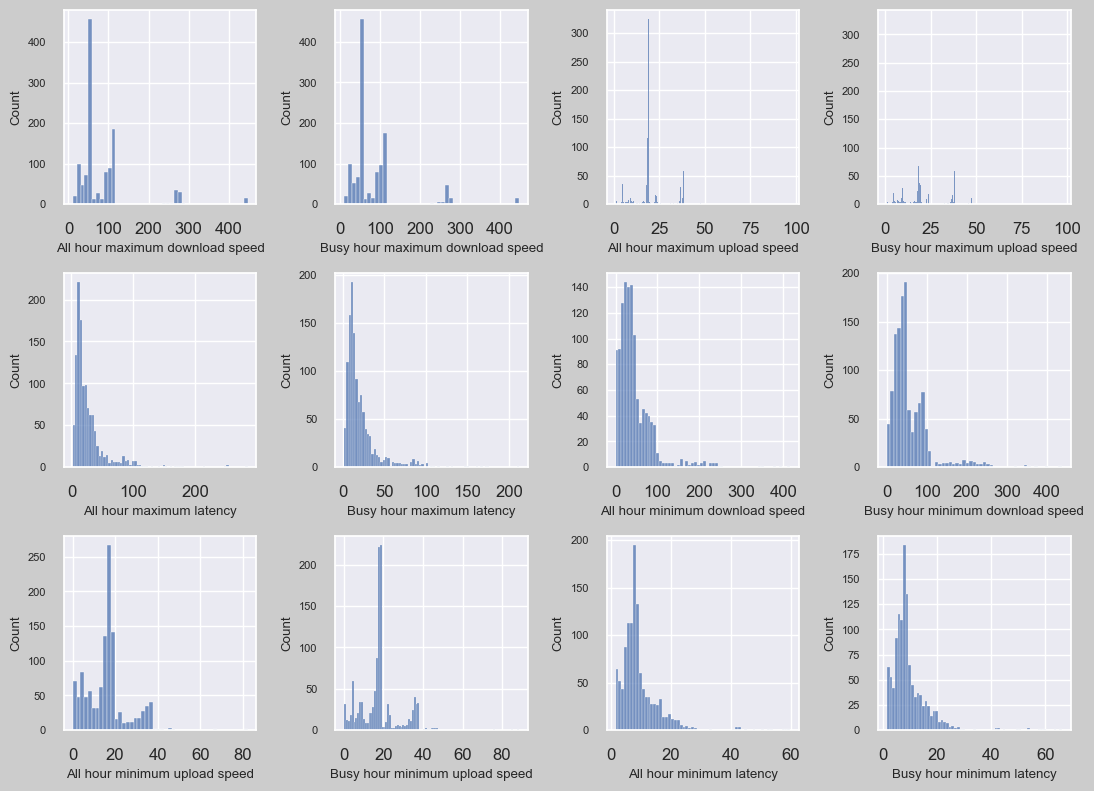

<Figure size 800x550 with 0 Axes>

In [95]:
#plotting the distribution of our metrics
kpi_outlier = ['All hour maximum download speed',  'Busy hour maximum download speed',
                'All hour maximum upload speed', 'Busy hour maximum upload speed',
                'All hour maximum latency', 'Busy hour maximum latency',
             'All hour minimum download speed',  'Busy hour minimum download speed',
                'All hour minimum upload speed', 'Busy hour minimum upload speed',
                'All hour minimum latency', 'Busy hour minimum latency',
             ]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,8))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=8)
plt.rc('xtick', labelsize=8)

for i, kpi in enumerate(kpi_outlier):
    sns.histplot(x=kpi, data=df, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

Notice that our histrograms are right-skewed, this is due to our metrics having different tiers of speed therefore, we will not consider them as outliers but involve them as a classifier together with their corresponding service provider.

**RSP vs. Maximum KPIs**

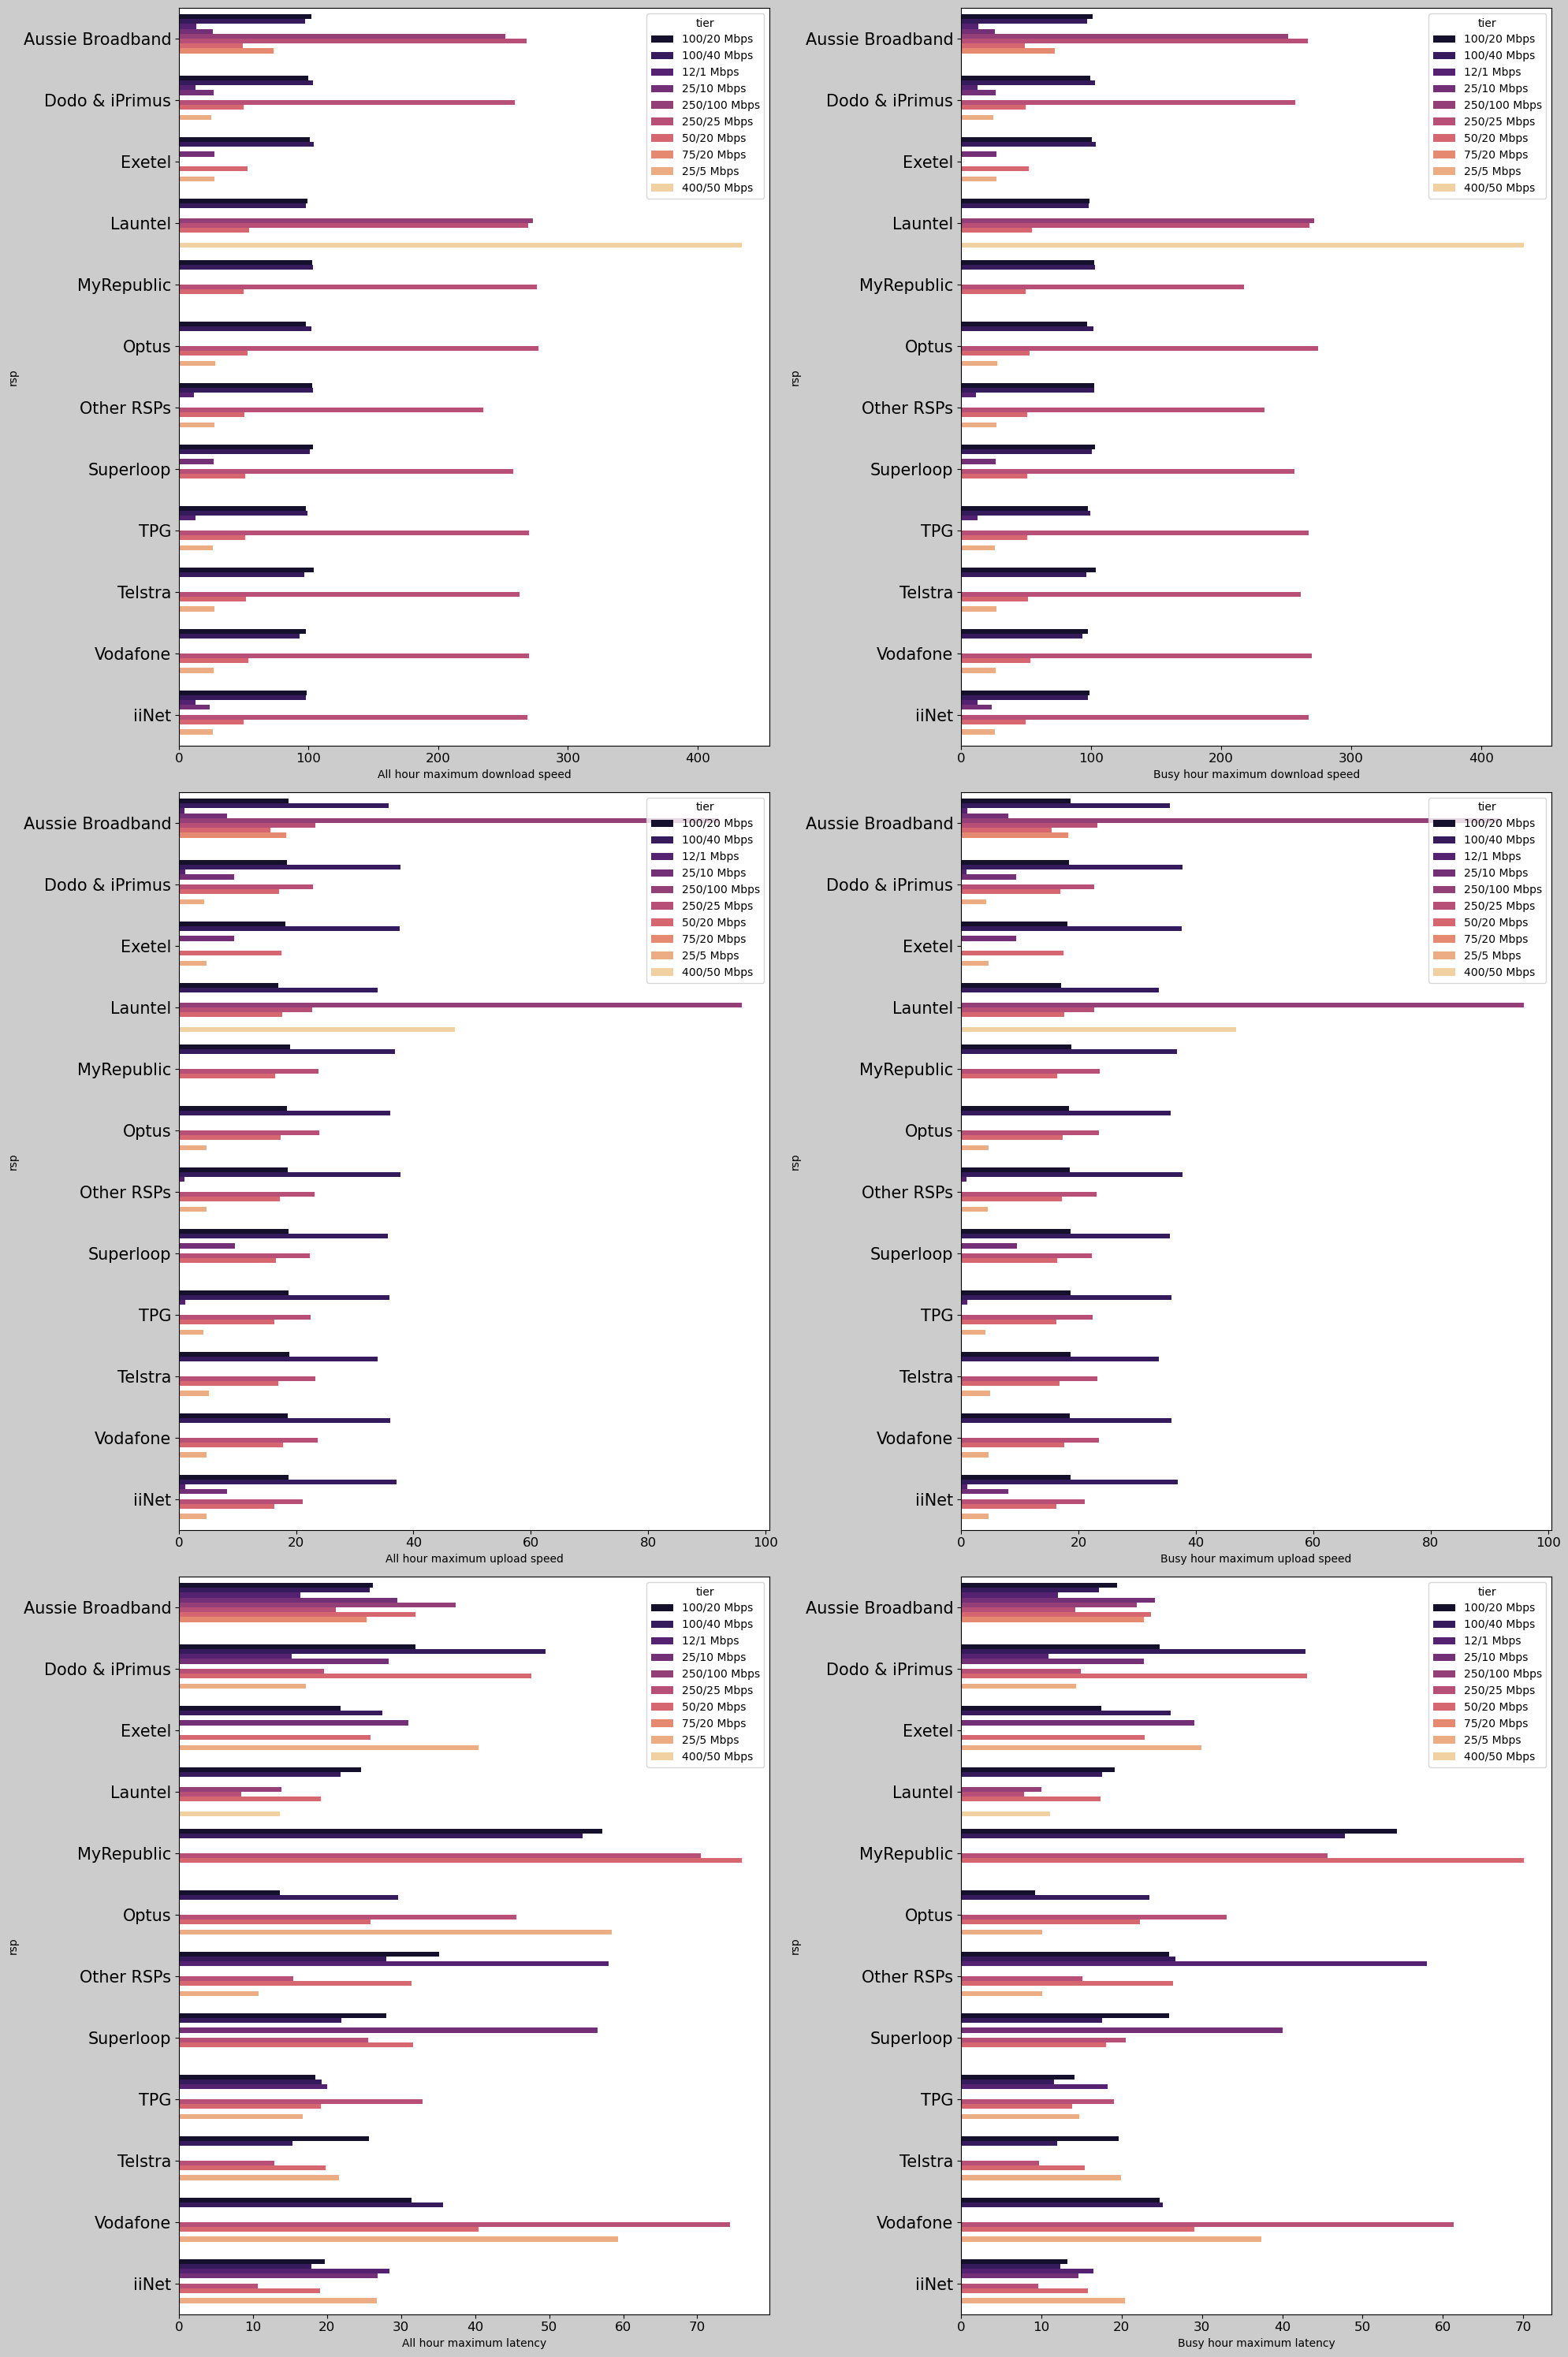

<Figure size 640x480 with 0 Axes>

In [8]:
kpi_upload = ['All hour maximum download speed',  'Busy hour maximum download speed',
                'All hour maximum upload speed', 'Busy hour maximum upload speed',
                'All hour maximum latency', 'Busy hour maximum latency']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=15)

for i, kpi in enumerate(kpi_upload):
    df_set = df.groupby(['rsp','tier'])[kpi].mean().reset_index()
    sns.barplot(x=kpi, y='rsp', hue='tier', data=df_set, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

 The visualization above shows the **fidelity of maximum upload and download speed for all service providers**. Also, it seems that **Aussie Broadband, Optus, TPG and iiNet have improved maximum latency during busy hour.** While some of the tiers in different service have significant increase in latency, most of them displays a consistent value.

**RSP vs. Minimum KPIs**

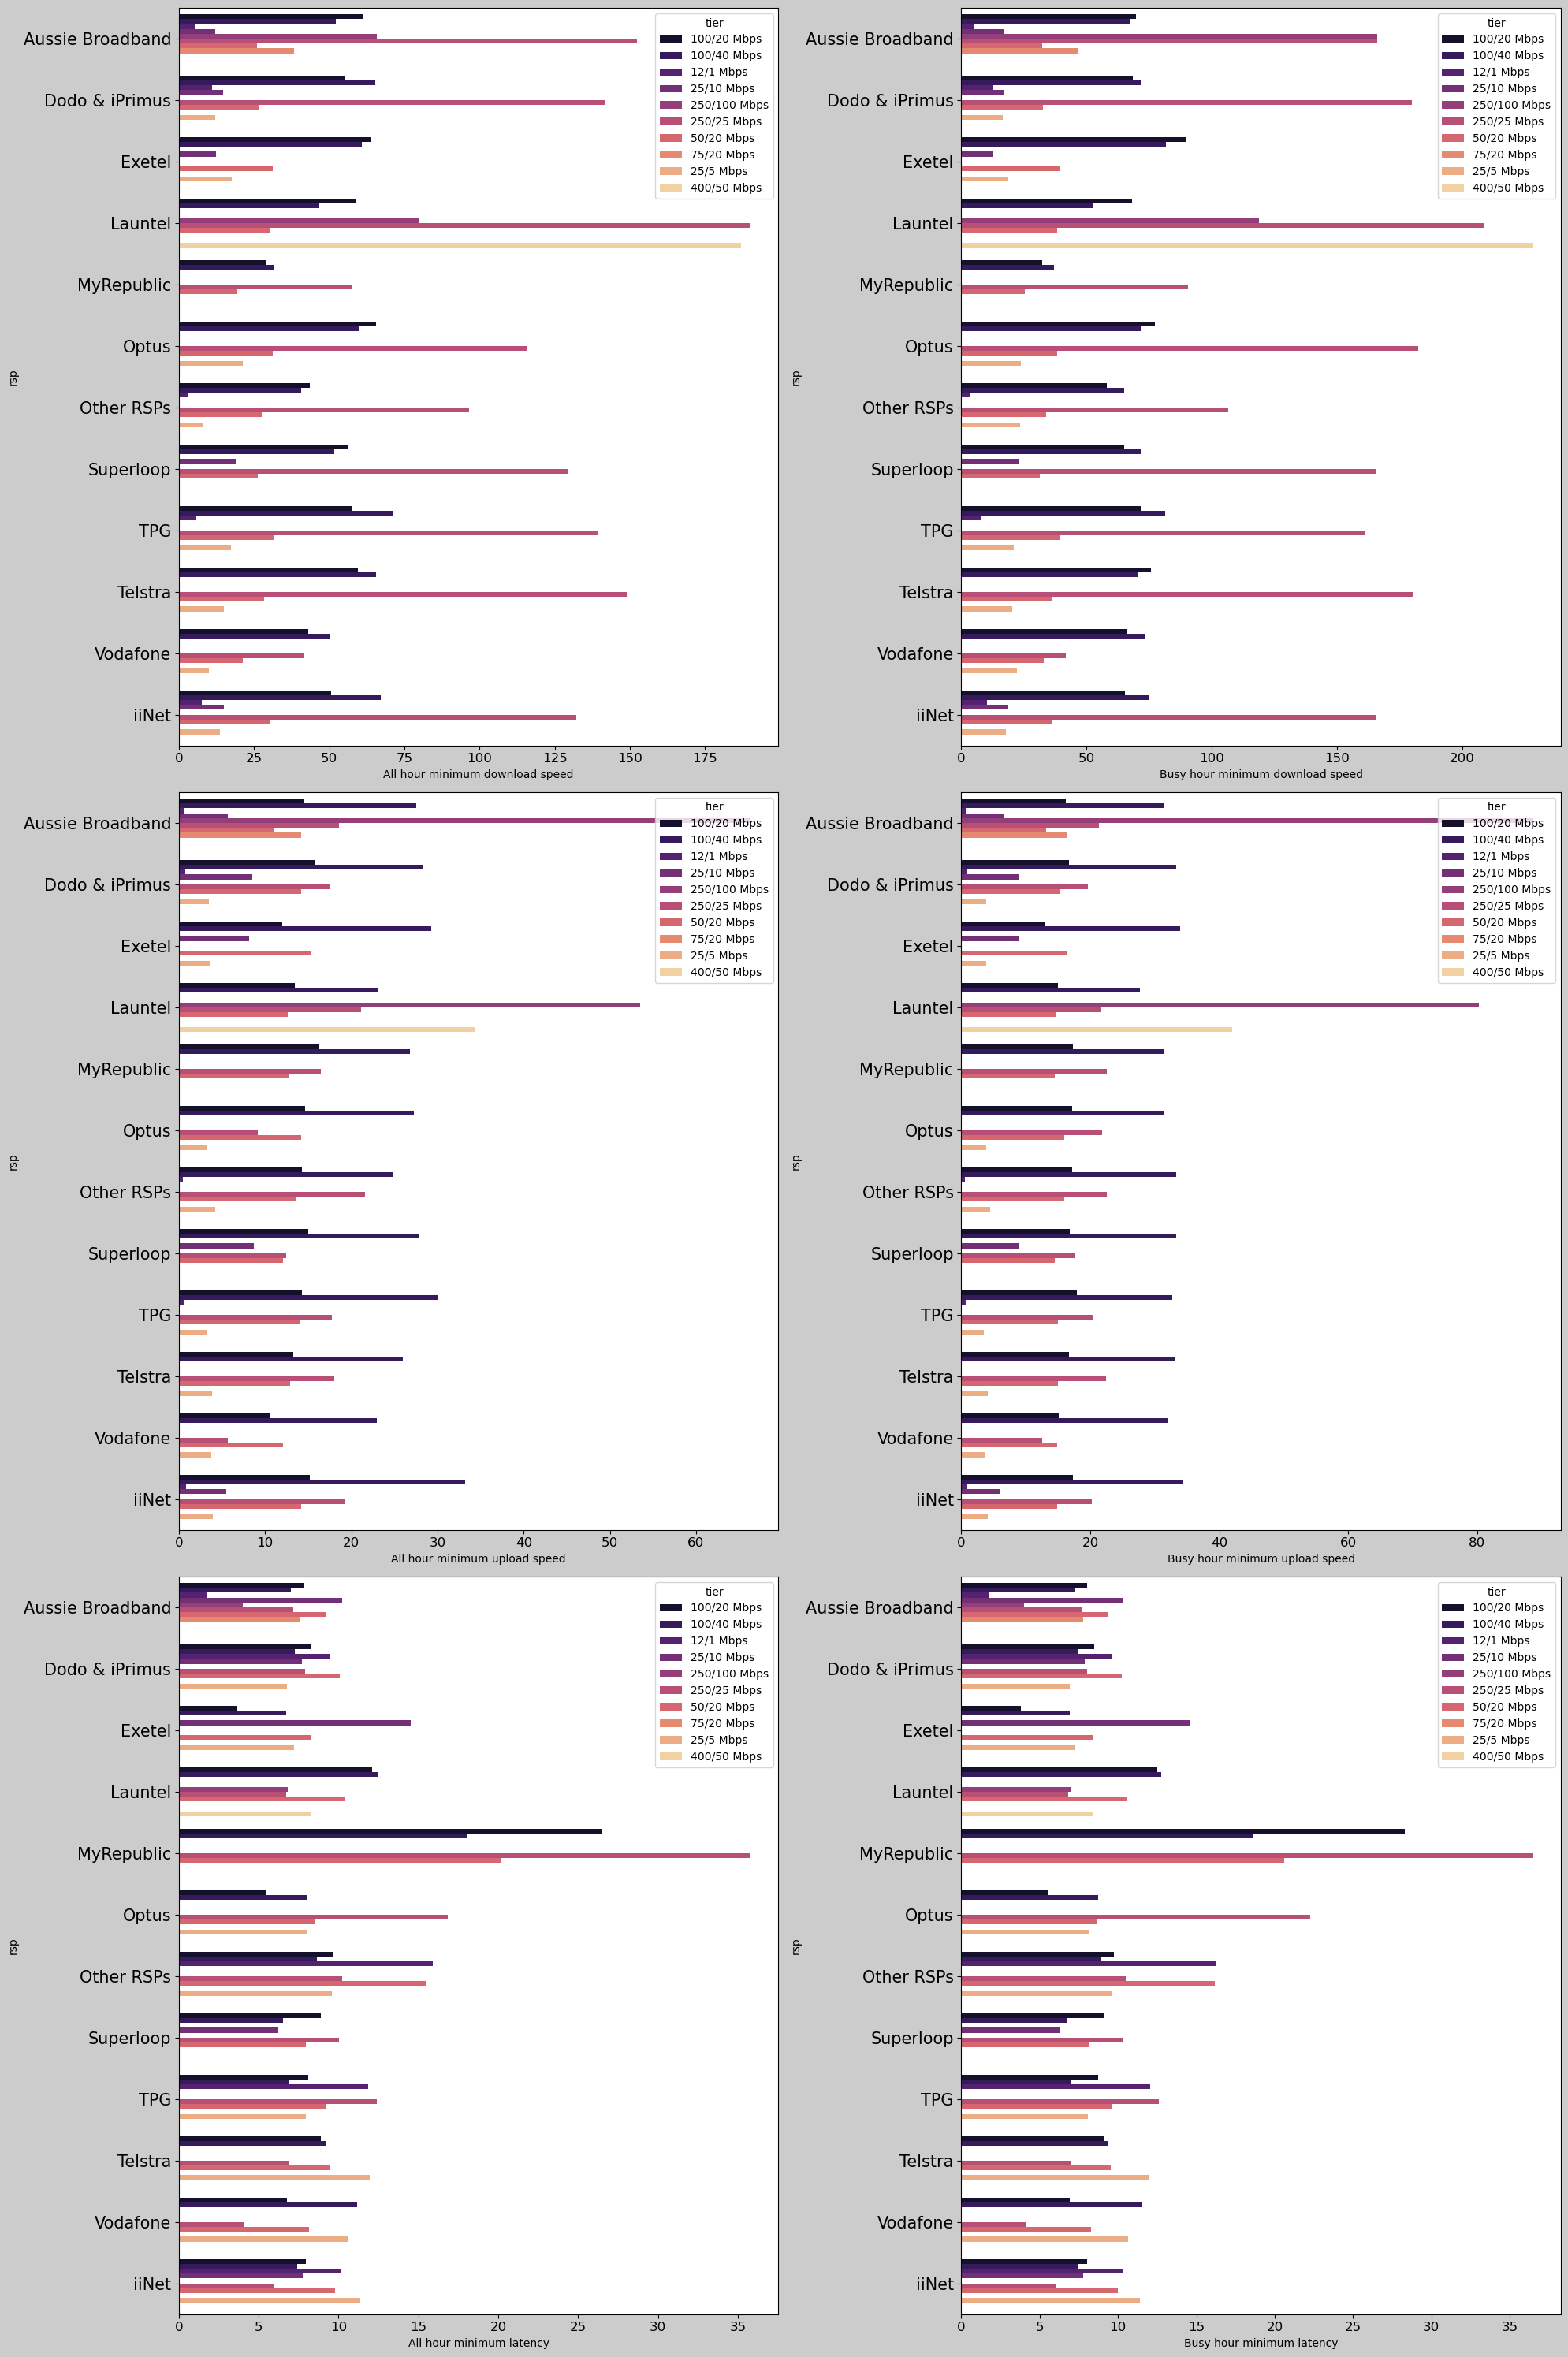

<Figure size 640x480 with 0 Axes>

In [9]:
kpi_download = ['All hour minimum download speed',  'Busy hour minimum download speed',
                'All hour minimum upload speed', 'Busy hour minimum upload speed',
                'All hour minimum latency', 'Busy hour minimum latency']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=15)

for i, kpi in enumerate(kpi_download):
    df_set = df.groupby(['rsp','tier'])[kpi].mean().reset_index()
    sns.barplot(x=kpi, y='rsp', hue='tier', data=df_set, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

From the plots, **the x-ticks for minimum download and upload speed are incremented by 25 and 20 respectively. This shows that both metrics increased during busy hours which clearly observed from tiers with 250Mbps and above mininum download speed**. The minimum latency stays consistent during busy hours sticking its values from the all hour records. 

**RSP vs. Trimmed mean KPIs**

We basically covered the analysis of KPI for download speed, upload speed and latency for all rsp and tiers showing difference in values during busy hours. But for reference, we will be plotting the trimmed mean values for all the metrics to see additional observations if any.

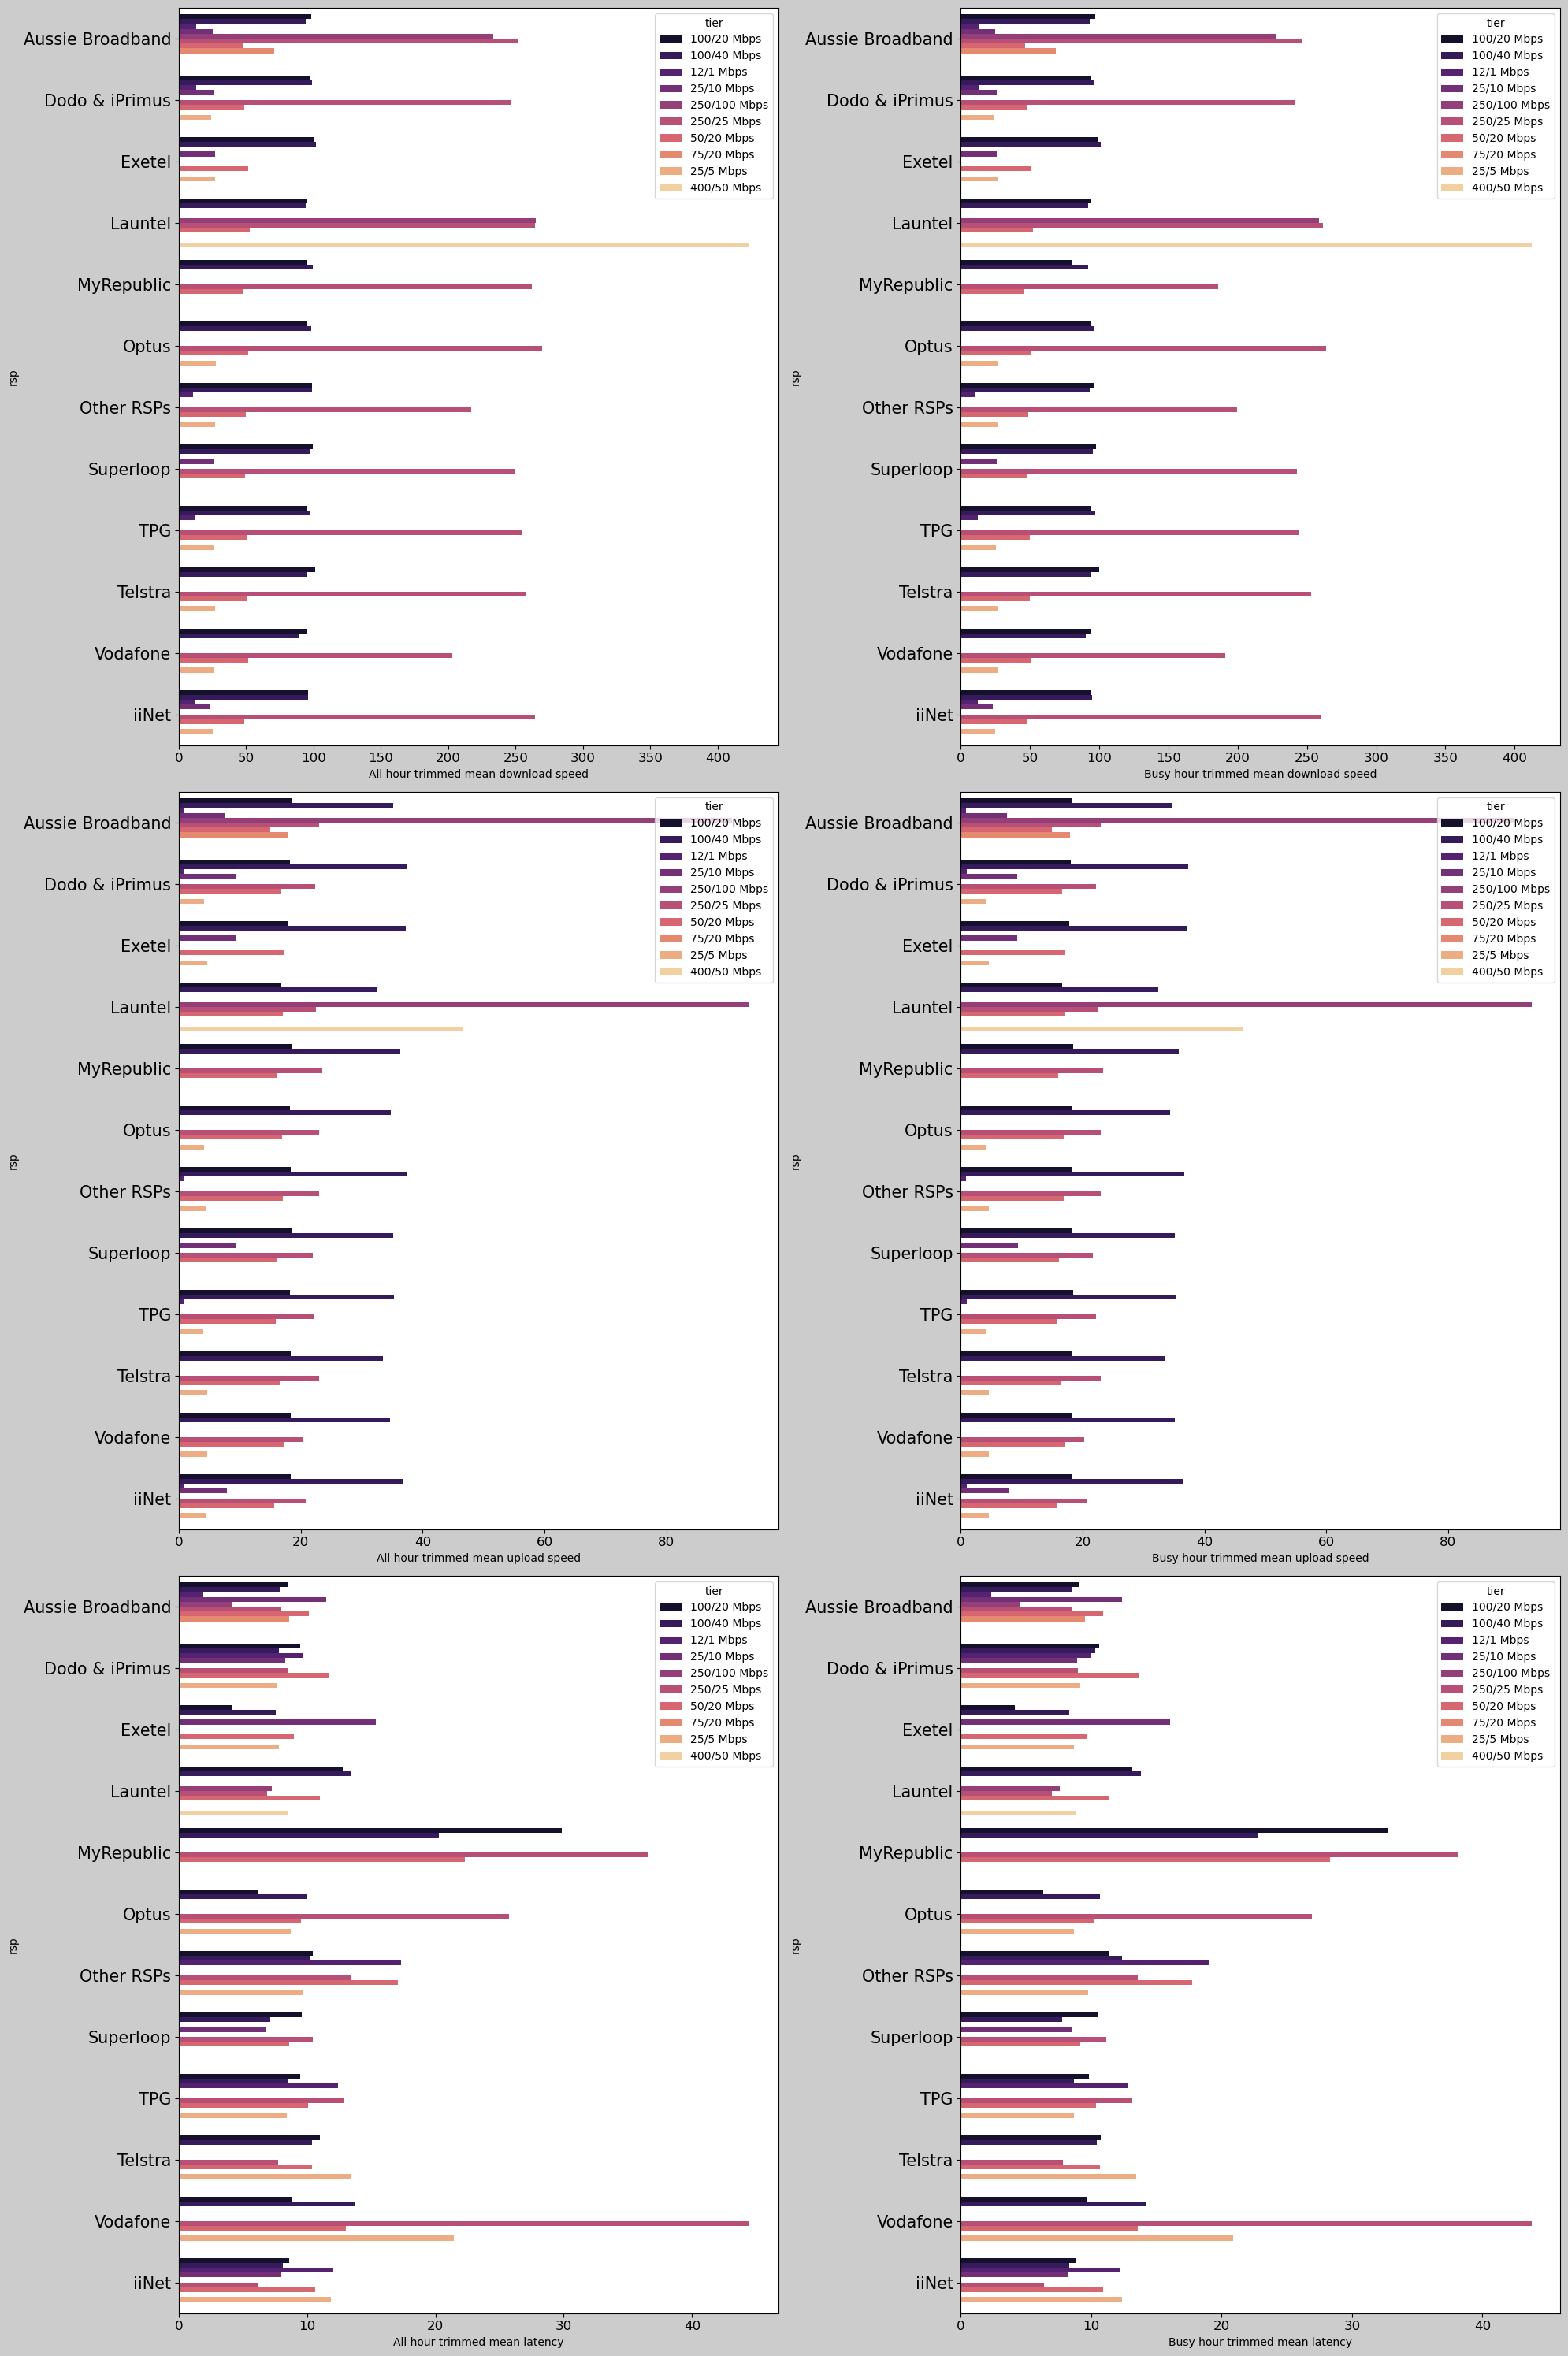

<Figure size 640x480 with 0 Axes>

In [10]:
kpi_trim = ['All hour trimmed mean download speed', 'Busy hour trimmed mean download speed',
            'All hour trimmed mean upload speed', 'Busy hour trimmed mean upload speed',
            'All hour trimmed mean latency', 'Busy hour trimmed mean latency']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=15)

for i, kpi in enumerate(kpi_trim):
    df_set = df.groupby(['rsp','tier'])[kpi].mean().reset_index()
    sns.barplot(x=kpi, y='rsp', hue='tier', data=df_set, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

**RSP vs. Average Daily Outages**

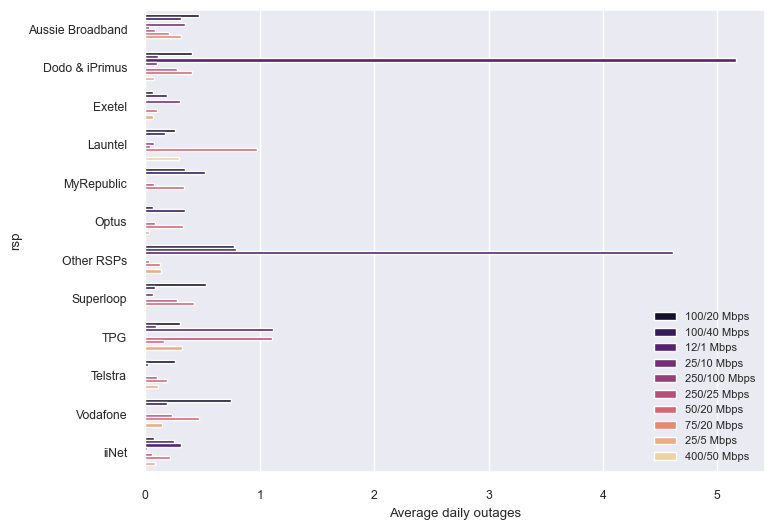

<Figure size 800x550 with 0 Axes>

In [91]:
plt.figure(figsize=(8,6))
df_out = df.groupby(['rsp', 'tier'])['Average daily outages'].mean().reset_index()
sns.barplot(x='Average daily outages', y='rsp', hue='tier', data=df_out, palette='magma', ci=None)
plt.legend(fontsize='small', loc='lower right')
sns.set(font_scale=0.8)
fig.tight_layout()
plt.show()
plt.clf()

12/1 Mbps have the most average daily outages in our tiers which is clearly observed from Dodo & iPrimus and Other RSPs.

**Technology vs. Mean KPI**

Now that we evaluated the metrics by retail service providers, let's visualize the technology comparison in metrics and tiers. The mean purpose of this plot is to provide customers preferences on what technology to choose regardless of retail service provider, territory and geography. 

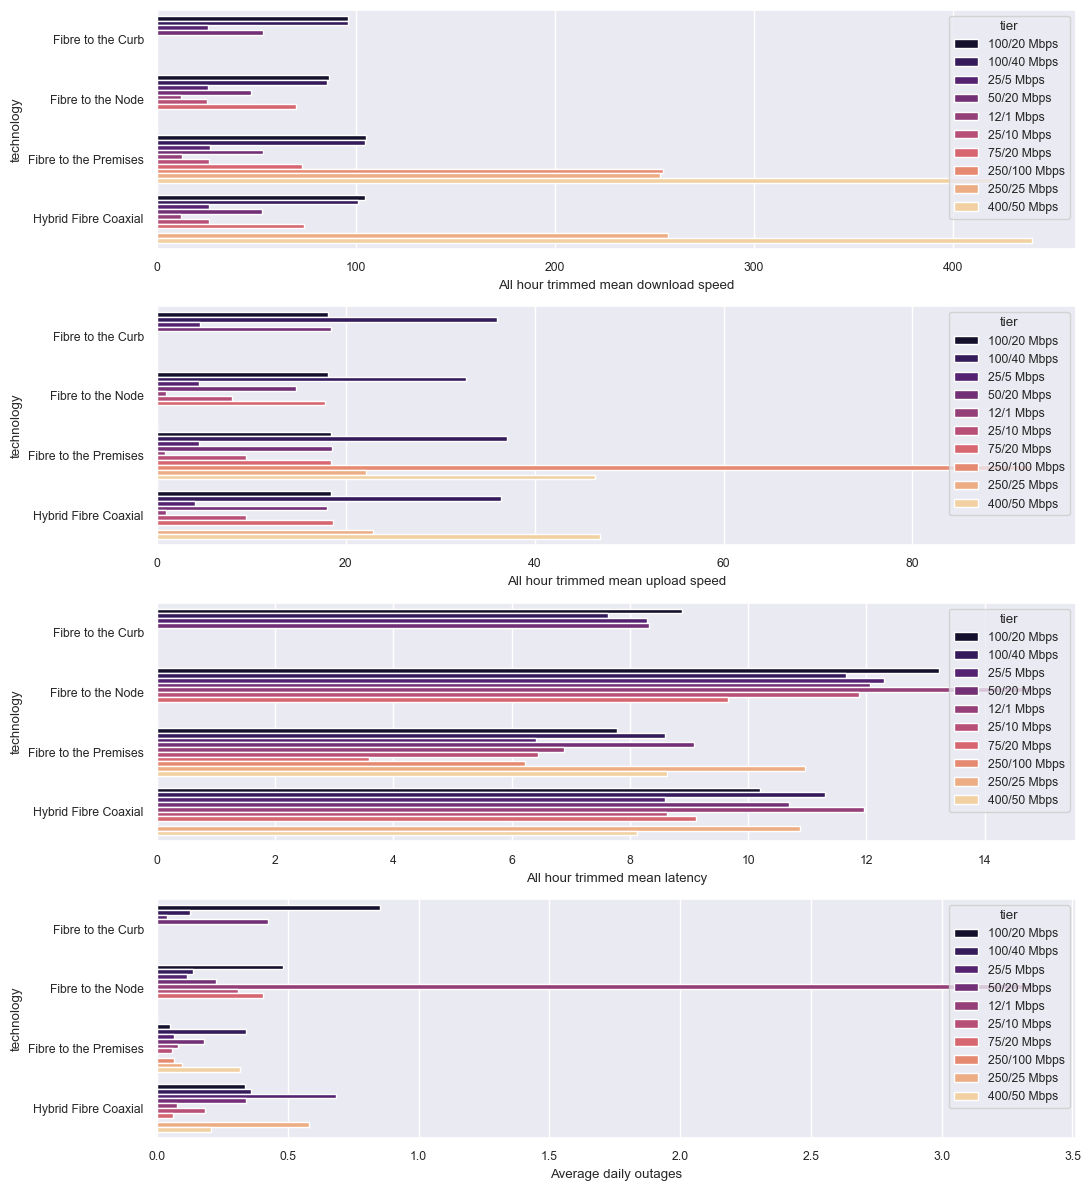

<Figure size 640x480 with 0 Axes>

In [12]:
kpi_trim = ['All hour trimmed mean download speed', 'All hour trimmed mean upload speed',
            'All hour trimmed mean latency', 'Average daily outages' ]

fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(11,12))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
sns.set(font_scale=0.8)
plt.rc('ytick', labelsize=10)

for i, kpi in enumerate(kpi_trim):
    df_set = df.groupby(['technology', 'tier'])[kpi].mean().reset_index()
    sns.barplot(x=kpi, y='technology', hue='tier', data=df_set, ax=axes[i], palette='magma')
    
fig.tight_layout()
plt.show()
plt.clf()

From the visualization, the trimmed metrics shows the following observations:
 - Fibre to the Curb and Fibre to the Node have the least capability for mean download and upload speed showing only select few of tiers.
 - Fibre to the Premises is the only technology that is capable of offering a technology with 100Mbps upload speed with 250Mbps and above download speed.
 -  100Mbps upload speed aside, Hybrid Fibre Coaxial seems to be on par with Fibre to the Premises. However, the latter shows better latency.
 - Fibre to the Premises also tops in the least average daily outages among other technologies.
 - Overall, Fibre to the Premises is our top preference when choosing a technology for our broadband connection.

### Performance Classification using Multiple Logistic Regression

In this section, we will be utilizing the **is_this_service_impaired** and **is_this_service_underperforming** to classify the value of our metrics. We will be using Multiple Logistic Regression to determine the have some expectation of our classification based on the value of the KPI metric by having the the recorded observation's corresponding probability.	

Since we will try to simulate a scenario that an individual would like to check if their connection, therefore we will utilize trimmed mean values and averages for our classification to have an aggregated value between minimum and maximum. We will also only using all hour values so that we can our classification can be done anytime of the day by an individual.

With this, our customers can determine if their connection is impaired or underperforming based on speed test and ping.

**Checking correlation with heatmap**

<AxesSubplot:>

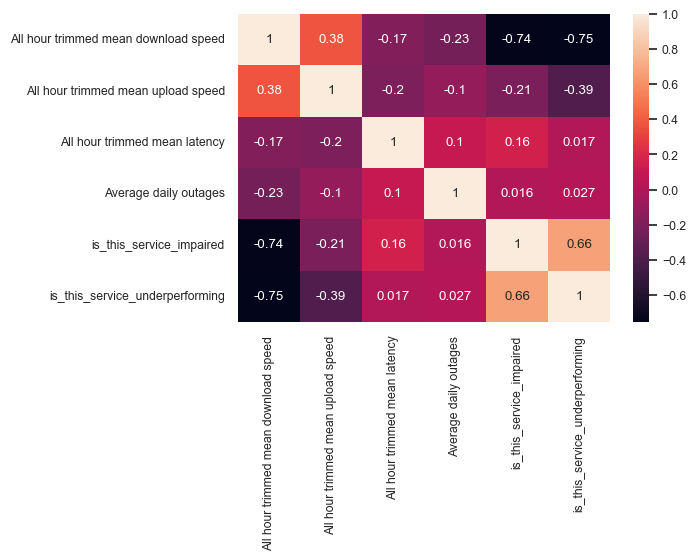

In [13]:
df_heat = df[['All hour trimmed mean download speed', 'All hour trimmed mean upload speed',
            'All hour trimmed mean latency','Average daily outages', 
              'is_this_service_impaired', 'is_this_service_underperforming', 'tier']]
df_100_20 = df_heat[df_heat.tier == '100/20 Mbps']
plt.figure(figsize=(6,4))
sns.set(font_scale=0.8)
sns.heatmap(df_100_20.corr(), fmt='.2g', annot=True)

Correlation shows that download and upload speed have negative relationship with service being impaired or underperforming, that would mean that increase of these value would lessen the probability of classifying True. On the other hand, average daily outages and latency have positive correlation.

In [14]:
#filtering our variables
df_log = df_100_20[['All hour trimmed mean download speed', 'All hour trimmed mean upload speed',
                    'All hour trimmed mean latency']]
df_log.head()

,All hour trimmed mean download speed,All hour trimmed mean upload speed,All hour trimmed mean latency
2,102.21,18.88,9.26
4,108.74,18.23,9.14
12,106.02,17.88,3.74
24,107.99,18.59,10.10
28,91.38,17.75,5.14


In [15]:
#creating variables for impaired and underperform
df_impaired = df_100_20['is_this_service_impaired']
df_underperf = df_100_20[ 'is_this_service_underperforming']

**Applying Multiple Logistic Regression for impaired service.**

In [16]:
#defining x and y
from sklearn.model_selection import train_test_split
x = np.array(df_log)
y = np.array(df_impaired)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (151, 3) (151,)
Test set: (38, 3) (38,)


In [17]:
#defining our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [18]:
y_pred = model.predict(x_test)
print(y_pred[0:5])
y_pred_prob = model.predict_proba(x_test)
print(y_pred_prob[0:5])

[False False False False False]
[[0.77755096 0.22244904]
 [0.97807161 0.02192839]
 [0.78890762 0.21109238]
 [0.97787117 0.02212883]
 [0.97126057 0.02873943]]


**Validating our model accuracy**

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import jaccard_score, log_loss
print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100,2),'%')
print('F1 Score:', round(f1_score(y_test, y_pred, average='micro')*100,2), '%')
print('Precision Score:', round(precision_score(y_test, y_pred, average='micro')*100,2), '%')
print('Recall Score:', round(recall_score(y_test, y_pred, average='micro')*100,2), '%')
print('Jaccard Score:', round(jaccard_score(y_test, y_pred, average='micro')*100,2), '%')
print('Log Loss:', round(log_loss(y_test, y_pred)))

Accuracy Score: 89.47 %
F1 Score: 89.47 %
Precision Score: 89.47 %
Recall Score: 89.47 %
Jaccard Score: 80.95 %
Log Loss: 4


Text(0.5, 1.0, 'MLR Impaired Classification Accuracy for 100/20 Mbps: 89.47 %')

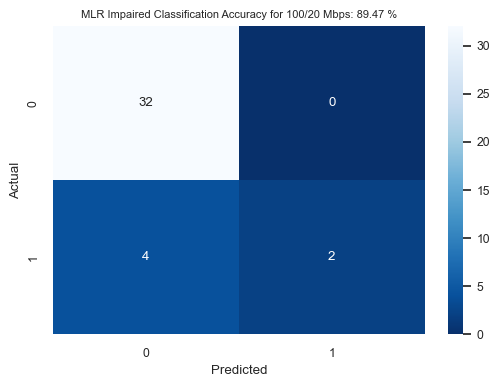

In [20]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(data=cmat, annot=True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('MLR Impaired Classification Accuracy for 100/20 Mbps: 89.47 %', loc='center', size='small')

**Testing some random arrays to predict.**

In [21]:
#testing random arrays for download speed, upload speed and latency
print(model.predict(np.array([[30,12,12], [40, 8, 4], [20,2,2]])))
print(model.predict_proba(np.array([[30,12,12], [40, 8, 4], [20,2,2]])))
# print(x_test[0:5])

[ True False False]
[[0.18375921 0.81624079]
 [0.71680241 0.28319759]
 [0.73979567 0.26020433]]


**Prediction results:**

Let's recall that higher download and upload is better while lower latency is preferred.

 - At 30 download speed, 12 upload speed and 12 latency, the prediction results True which corresponds to **service is impaired.**
 - At 40 download speed, 8 upload speed and 4 latency, the prediction results True which corresponds to **service is not impaired.**
 - At 20 download speed, 2 upload speed and 2 latency, the prediction results True which corresponds to **service is not impaired.**

**Determine our minimum KPI values to consider that our connection is impaired**

In [22]:
print(model.predict(np.array([[24,5,12], [23,5,12], [23,4.8,12], [23,4.8,13],[23,5,11]])))
print(model.predict_proba(np.array([[24,5,12], [23,5,12], [23,4.8,12], [23,4.8,13],[23,5,11]])))

[False  True False  True False]
[[0.51338994 0.48661006]
 [0.49154285 0.50845715]
 [0.50632087 0.49367913]
 [0.49496632 0.50503368]
 [0.50289707 0.49710293]]


In this part, we've set our download speed to 24, upload speed 5, and latency to 12. We will try to tweak this value and observe how the probabilities change.

 - At initial value (24,5,12), got a probability of 0.51338994(False), 0.48661006(True). Predicted **False**
 - Decreasing the download speed value (23,5,12), got a probability of 0.49154285(False), 0.50845715(True). Predicted **True**
 - Decreasing the upload speed value (23,4.8,12), got a probability of 0.50632087(False), 0.49367913(True). Predicted **False**
 - Increasing the latency value (23,4.8,13), got a probability of 0.49496632(False), 0.50503368(True). Predicted **True** 
 - Decreasing the latency value (23,4.8,11), got a probability of 0.50289707(False),0.49710293(True). Predicted **False**  
 
Therefore, the limits of the metrics to consider our service is impaired are:
 - Download speed at 23 is considered  as impaired, further decrease in the value increases probability.
 - Upload speed at 5 is considered  as impaired, further increase in the value increases probability.
 - Latency value at 13 is considered  as impaired, further increase in the value increases probability. 

**Applying Multiple Logistic Regression for underperforming service.**

In [23]:
#defining x and y
x2 = np.array(df_log)
y2 = np.asarray(df_underperf)
x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.2, random_state=42)
#defining our model
model2 = LogisticRegression(C=0.01, solver='liblinear').fit(x2_train,y2_train)
y2_pred = model2.predict(x2_test)
print(y2_pred[0:5])
y2_pred_prob = model2.predict_proba(x_test)
print(y2_pred_prob[0:5])

[False False False False False]
[[0.88263016 0.11736984]
 [0.98481708 0.01518292]
 [0.90442245 0.09557755]
 [0.98656964 0.01343036]
 [0.98428807 0.01571193]]


**Validating our model accuracy**

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import jaccard_score, log_loss
print('Accuracy Score:', round(accuracy_score(y2_test, y2_pred)*100,2),'%')
print('F1 Score:', round(f1_score(y2_test, y2_pred, average='micro')*100,2), '%')
print('Precision Score:', round(precision_score(y2_test, y2_pred, average='micro')*100,2), '%')
print('Recall Score:', round(recall_score(y2_test, y2_pred, average='micro')*100,2), '%')
print('Jaccard Score:', round(jaccard_score(y2_test, y2_pred, average='micro')*100,2), '%')
print('Log Loss:', round(log_loss(y2_test, y2_pred)))

Accuracy Score: 92.11 %
F1 Score: 92.11 %
Precision Score: 92.11 %
Recall Score: 92.11 %
Jaccard Score: 85.37 %
Log Loss: 3


Text(0.5, 1.0, 'MLR Underperforming Classification Accuracy for 100/20 Mbps: 92.11 %')

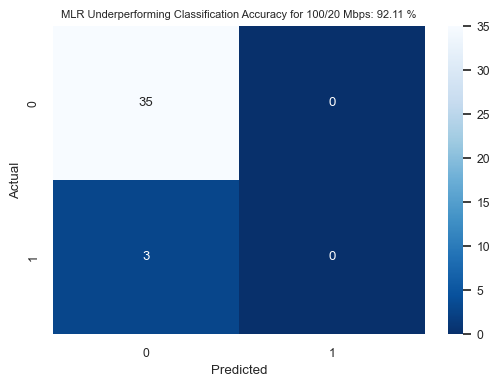

In [25]:
cmat2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(6,4))
sns.heatmap(data=cmat2, annot=True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('MLR Underperforming Classification Accuracy for 100/20 Mbps: 92.11 %', loc='center', size='small')

**Testing some random arrays to predict.**

In [26]:
#testing random arrays for download speed, upload speed and latency
print(model2.predict(np.array([[30,12,12], [40, 8, 4], [20,2,2]])))
print(model2.predict_proba(np.array([[30,12,12], [40, 8, 4], [20,2,2]])))

[ True False False]
[[0.35519731 0.64480269]
 [0.77645007 0.22354993]
 [0.74991763 0.25008237]]


**Prediction results:**

Let's recall that higher download and upload is better while lower latency is preferred.

 - At 30 download speed, 12 upload speed and 12 latency, the prediction results True which corresponds to **service is underperforming.**
 - At 40 download speed, 8 upload speed and 4 latency, the prediction results True which corresponds to **service is not underperforming.**
  - At 20 download speed, 2 upload speed and 2 latency, the prediction results True which corresponds to **service is not underperforming.**

**Determine our minimum KPI values to consider that our connection is impaired**

In [27]:
print(model2.predict(np.array([[20,5,12], [16,5,12], [16,4.8,12], [16,4.8,16],[16,4.8,15]])))
print(model2.predict_proba(np.array([[20,5,12], [16,5,12], [16,4.8,12], [16,4.8,16],[16,4.8,15]])))

[False  True False  True False]
[[0.57379795 0.42620205]
 [0.49323401 0.50676599]
 [0.50540988 0.49459012]
 [0.49838809 0.50161191]
 [0.50014359 0.49985641]]


We've set our download speed to 20, upload speed 5, and latency to 12. We will try to tweak this value and observe how the probabilities change.

 - At initial value (20,5,12), got a probability of 0.57379795(False), 0.42620205(True). Predicted **False**
 - Decreasing the download speed value (16,5,12), got a probability of 0.49323401(False), 0.50676599(True). Predicted **True**
 - Decreasing the upload speed value (16,4.8,12), got a probability of 0.50540988(False), 0.49459012(True). Predicted **False**
 - Increasing the latency value (16,4.8,16), got a probability of 0.49838809(False), 0.50161191(True). Predicted **True** 
 - Decreasing the latency value (16,4.8,15), got a probability of 0.50014359(False) 0.49985641(True). Predicted **False**  
 
Therefore, the limits of the metrics to consider our service is impaired are:
 - Download speed at 16 is considered  as underperforming, further decrease in the value increases probability.
 - Upload speed at 5 is considered  as underperforming, further increase in the value increases probability.
 - Latency value at 16 is considered  as underperforming, further increase in the value increases probability. 

### Broadband Segmentation by Clustering

**Data Preprocessing**

The following will be done to process our data:
 - Label Encoding
 - Scaling our features using Standard Scaler
 - Dimensionality reduction using PCA
 
This time we will use tha maximum and minimum value to determine the high download and upload speed during our clustering.

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [29]:
df_clus = df.copy()
LE=LabelEncoder()
for i in df_clus:
    df_clus[i]=df_clus[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [30]:
#Creating a subset of dataframe by selecting the features
df_kmean = df_clus[['technology', 'tier', 'rsp', 'state_or_territory', 'geography',
                   'All hour trimmed mean download speed', 'All hour trimmed mean upload speed',
                    'All hour trimmed mean latency', 'Average daily outages']]
# #Scaling
scaler = StandardScaler()
scaler.fit(df_kmean)
scaled_df = pd.DataFrame(scaler.transform(df_kmean),columns= df_kmean.columns )
print("All features are now scaled")

All features are now scaled


In [31]:
print("Variables to be used for further modeling:")
scaled_df.head()

Variables to be used for further modeling:


,technology,tier,rsp,state_or_territory,geography,All hour trimmed mean download speed,All hour trimmed mean upload speed,All hour trimmed mean latency,Average daily outages
0,-0.647714,0.897169,0.624115,-1.037326,0.333411,-1.047385,-1.414800,-0.775134,-0.539554
1,1.506542,-1.443865,0.362650,-1.037326,0.333411,0.893671,0.310278,0.114374,0.250986
2,-1.724843,-1.151236,-0.160281,-1.037326,0.333411,0.845245,1.531633,-0.505716,-0.583473
3,1.506542,-1.443865,0.885580,1.051261,0.333411,1.462670,-0.076139,0.084438,1.788146
4,1.506542,0.897169,0.624115,-1.037326,0.333411,-0.373463,-1.835719,0.695975,-0.583473


In [32]:
#For visualization we will use n_components to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["A","B", "C"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1199.0,5.629822e-17,1.517778,-2.881228,-1.374755,0.096747,1.231032,3.312720
B,1199.0,-4.629787e-19,1.062823,-2.221766,-0.717936,-0.043290,0.626200,4.224853
C,1199.0,2.337117e-16,1.052304,-3.097474,-0.719968,-0.017072,0.682444,3.803385


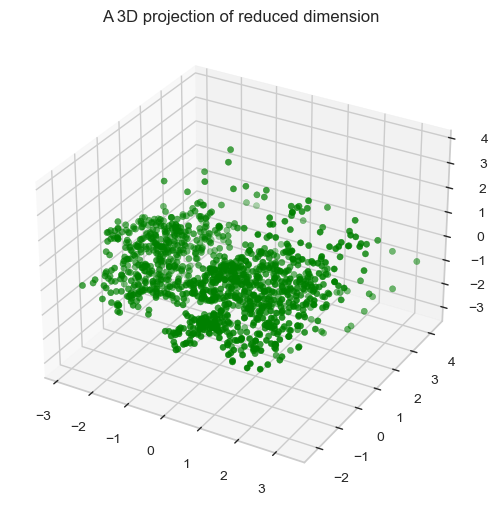

In [33]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["A"]
y =PCA_df["B"]
z =PCA_df["C"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="Green", marker="o" )
ax.set_title("A 3D projection of reduced dimension")
plt.show()

**Clustering**

Elbow Method to determine the number of clusters to be formed:


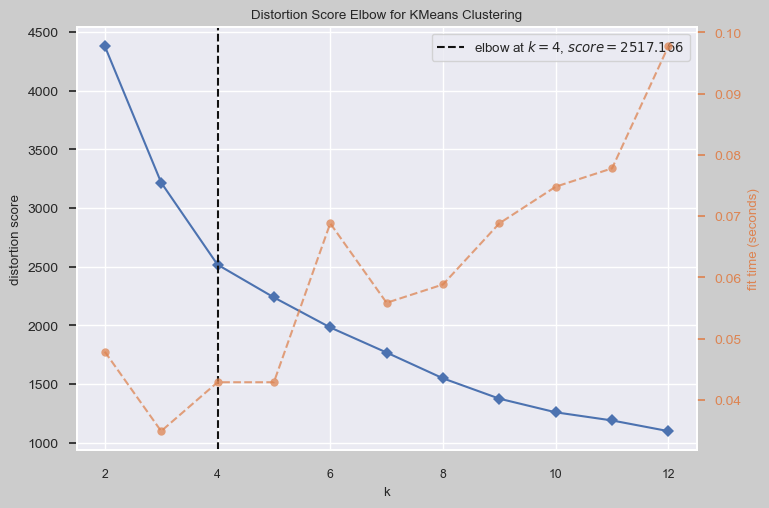

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=12)
Elbow_M.fit(PCA_df)
Elbow_M.show()

From the elbow visualization above, it seems that k=4 is the optimal number of clusters in this data. Now, lets fit this clusters using Agglomerative Clustering.

In [119]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
y_clus = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = y_clus
#Adding the cluster to our original data
df["Clusters"]= y_clus

**Checking our final clusters using 3D Projection**

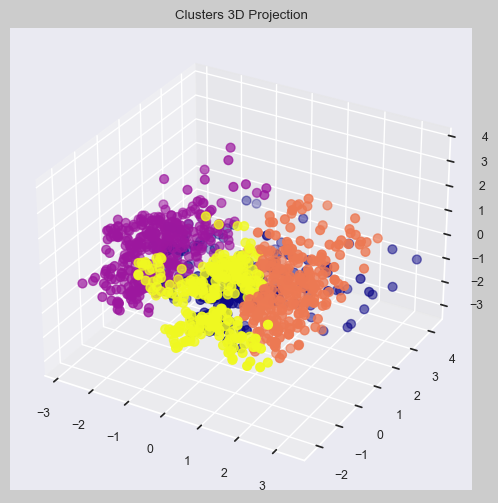

In [120]:
#Plotting the clusters
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'plasma' )
ax.set_title("Clusters 3D Projection")
plt.show()

### Cluster Profiling

In this section, we will evaluate the clusters regardless of the tiers to see the segmented speed and preferences when it comes to technology, service provider, state and geography.

Text(0.5, 1.0, 'Distribution Of The Clusters')

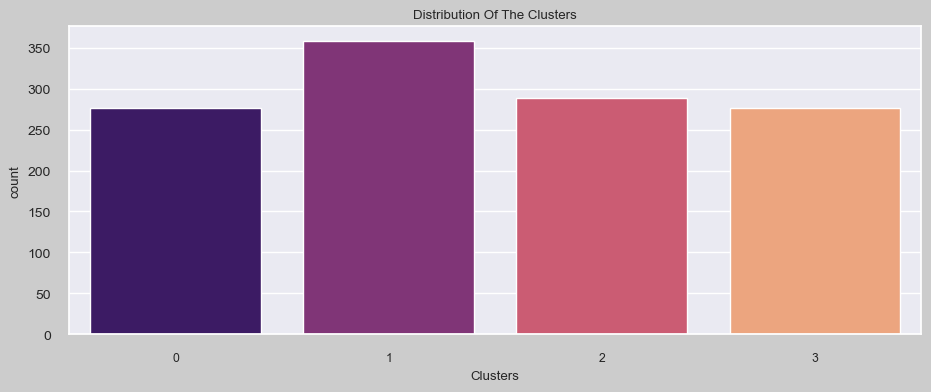

In [121]:
plt.figure(figsize=(11,4))
sns.countplot(x=df["Clusters"], palette= 'magma')
plt.title("Distribution Of The Clusters")

Cluster 1 have a higher count in the cluster followed by 2. Cluster 3 has the least number of count in its cluster.

**Cluster vs. KPI**

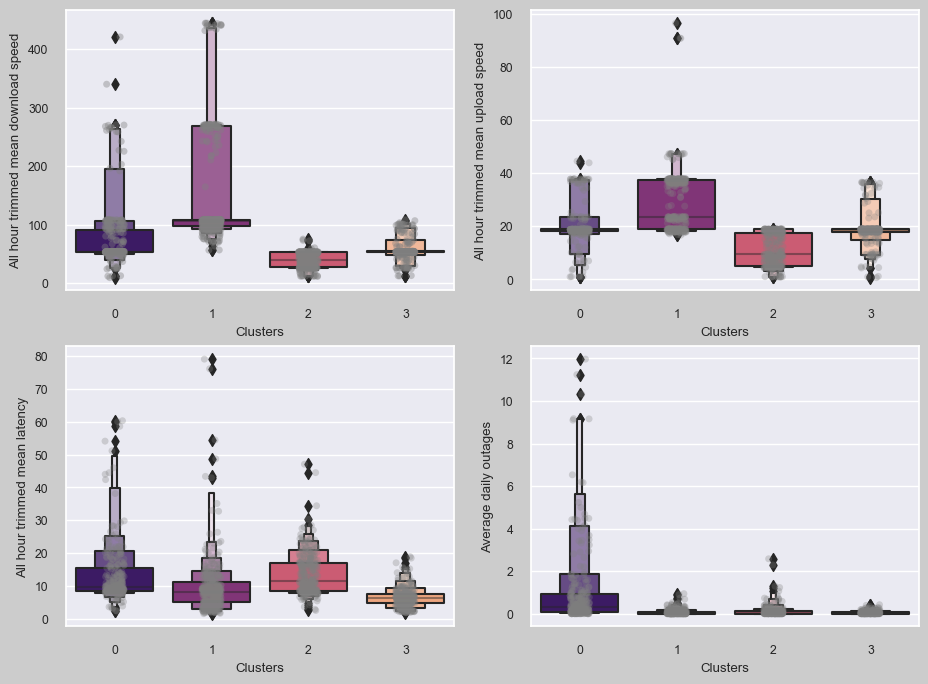

In [124]:
plt.figure(figsize=(11,8))
sns.set(font_scale=0.8)
plt.subplot(2,2,1)
sns.stripplot(x=df["Clusters"], y=df["All hour trimmed mean download speed"], color= "#808080", alpha=0.4)
sns.boxenplot(x=df["Clusters"], y=df["All hour trimmed mean download speed"], palette='magma')
plt.subplot(2,2,2)
sns.stripplot(x=df["Clusters"], y=df["All hour trimmed mean upload speed"], color= "#808080", alpha=0.3)
sns.boxenplot(x=df["Clusters"], y=df["All hour trimmed mean upload speed"], palette='magma')
plt.subplot(2,2,3)
sns.stripplot(x=df["Clusters"], y=df["All hour trimmed mean latency"], color= "#808080", alpha=0.3)
sns.boxenplot(x=df["Clusters"], y=df["All hour trimmed mean latency"], palette='magma')
plt.subplot(2,2,4)
sns.stripplot(x=df["Clusters"], y=df["Average daily outages"], color= "#808080", alpha=0.3)
sns.boxenplot(x=df["Clusters"], y=df["Average daily outages"], palette='magma')
plt.show()

**Cluster vs. RSP, Technology, State and Geography**

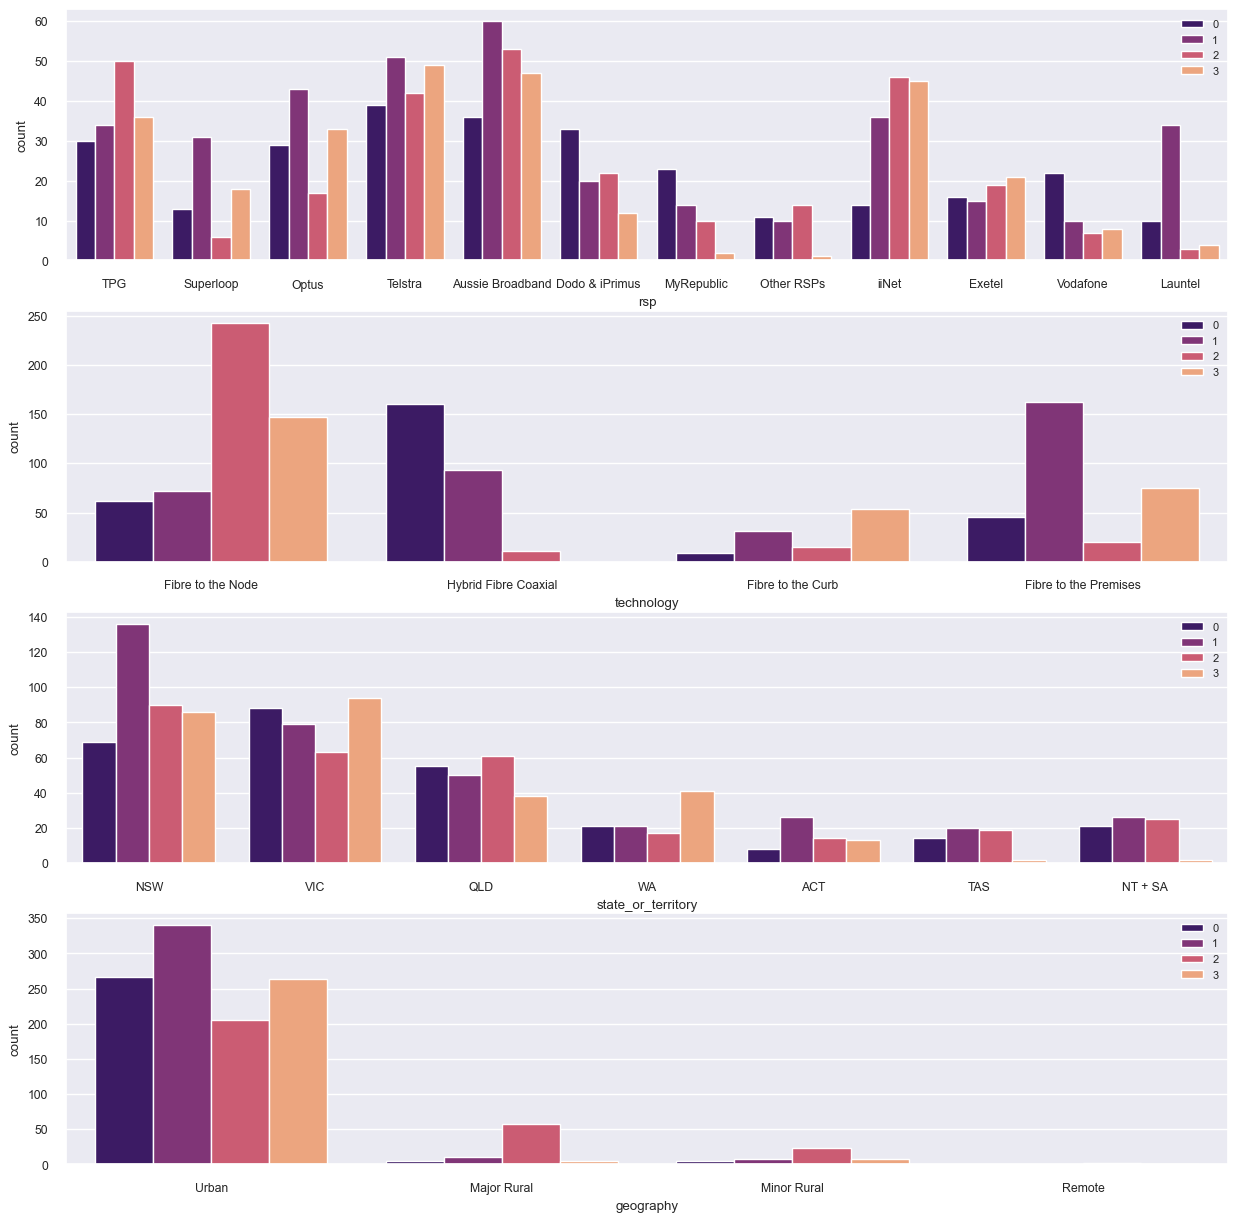

<Figure size 800x550 with 0 Axes>

In [123]:
category = ['rsp', 'technology', 'state_or_territory', 'geography']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,15))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=10)

for i, cat in enumerate (category):
    sns.countplot(x=cat, hue='Clusters', data=df, ax=axes[i], palette='magma')
    axes[i].legend(loc='upper right', fontsize='small')
    
plt.show()
plt.clf()

#### Cluster Profiles
**Cluster 0:**
 - Download Speed: up to 275Mbps
 - Upload Speed: up to 40Mbps
 - Latency: High
 - Average Daily Outages: High
 - Broadband Service Preference: Telstra (Service provider), Hybrid Fibre Coaxial (Technology)
 - Additional Description: Commonly utilized in Victoria State and unavailable for remote services.

**Cluster 1:**
 - Download Speed: up to 450Mbps
 - Upload Speed: up to 50Mbps
 - Latency: Low
 - Average Daily Outages: Low
 - Broadband Service Preference: Aussie Broadband or Telstra (Service provider), Fibre to the Premises (Technology)
 - Additional Description: Commonly utilized in New South Wales, top choice in urban geography and unavailable for remote services.

**Cluster 2:**
 - Download Speed: up to 50Mbps
 - Upload Speed: up to 20Mbps
 - Latency: Average
 - Average Daily Outages: Low
 - Broadband Service Preference: Aussie Broadband or TPG (Service provider), Fibre to the Node (Technology)
 - Additional Description: Also commonly utilized in New South Wales and unavailable for remote services.

**Cluster 3:**
 - Download Speed: up to 100Mbps
 - Upload Speed: up to 40Mbps
 - Latency: Very Low
 - Average Daily Outages: Low
 - Broadband Service Preference: Telstra, Aussie Broadband and iiNet (Service provider), Fibre to the Node (Technology)
 - Additional Description: Commonly utilized in Victoria State and unavailable for remote services.